In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df=pd.read_csv('/content/new.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/2013,19.779285,19.821428,19.343929,19.608213,16.862818,560518000
1,03/01/2013,19.567142,19.631071,19.321428,19.360714,16.649981,352965200
2,04/01/2013,19.177500,19.236786,18.779642,18.821428,16.186199,594333600
3,07/01/2013,18.642857,18.903570,18.400000,18.710714,16.090986,484156400
4,08/01/2013,18.900356,18.996071,18.616072,18.761070,16.134293,458707200


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2519.000000,2519.000000,2519.000000,2519.000000,2519.000000,2.519000e+03
mean,62.379314,63.083422,61.692682,62.412564,60.621905,1.713193e+08
std,48.673796,49.312799,48.041917,48.700542,49.244730,1.250370e+08
min,13.856071,14.271429,13.753571,13.947500,12.064584,3.519590e+07
25%,26.972500,27.221251,26.705000,26.985000,24.663037,9.184030e+07
50%,41.362499,41.882500,40.907501,41.314999,39.491535,1.301080e+08
75%,91.265000,92.793751,90.738751,91.421249,90.018932,2.044812e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.460852e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2519 non-null   object 
 1   Open       2519 non-null   float64
 2   High       2519 non-null   float64
 3   Low        2519 non-null   float64
 4   Close      2519 non-null   float64
 5   Adj Close  2519 non-null   float64
 6   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.9+ KB


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df["Date"])
df.dtypes

<ipython-input-63-231567579c55>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df["Date"])


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

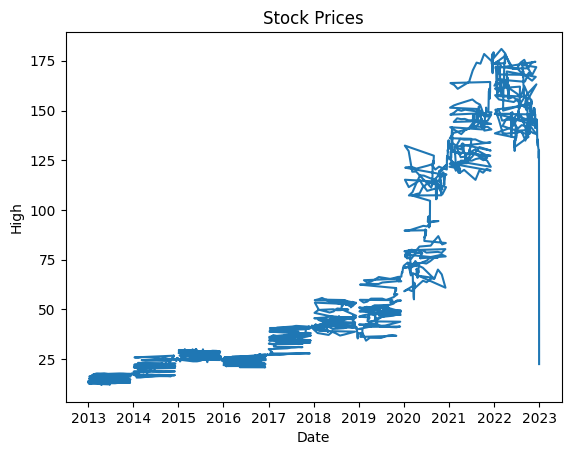

In [ ]:
# fig = go.Figure()
# obj = go.Scatter(
#     x = ,
#     y = ,
#     mode = 'lines',
#     name="High",
# )
# fig.add_trace(obj)
# fig.update_layout(title='Stock Prices' , legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
# fig.show()

plt.plot(df['Date'], df['Adj Close'])
# Adding Title to the Plot
plt.title("Stock Prices")
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

In [ ]:
df['MA3'] = df['Adj Close'].rolling(3, min_periods=1).mean()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA3
0,2013-02-01,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,16.862818
1,2013-03-01,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,16.756400
2,2013-04-01,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,16.566333
3,2013-07-01,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,16.309055
4,2013-08-01,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,16.137159


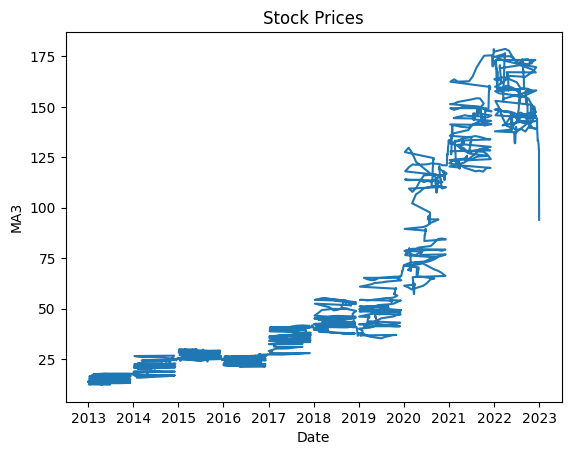

In [ ]:
plt.plot(df['Date'], df['MA3'])
# Adding Title to the Plot
plt.title("Stock Prices")
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('MA3')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['MA3']], test_size=.2)


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
preds = reg.predict(X_test)

In [ ]:
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test, preds))

Model Coefficients: [[0.99877814]]
Mean Absolute Error: 0.6487002026695209
Coefficient of Determination: 0.999461378623722


**logistic reg**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


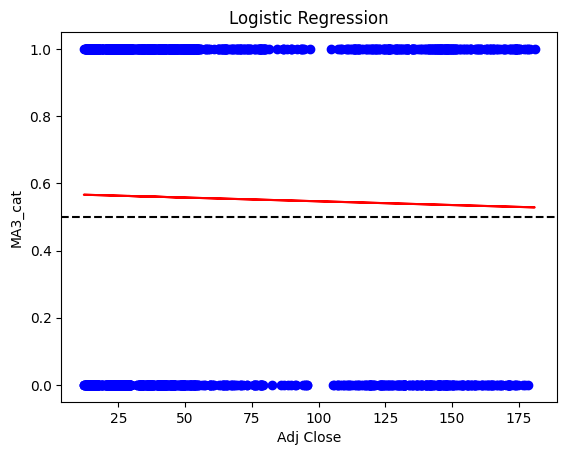

Accuracy: 0.5476190476190477
Mean Absolute Error: 0.4523809523809524


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
# Discretize the target variable into two categories
df['MA3_cat'] = np.where(df['MA3'] >= df['Adj Close'], 0, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['MA3_cat']], test_size=.2)


lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lr.predict_proba(X_train)[:,1], color='red')
plt.axhline(y=0.5, color='black', linestyle='--')
plt.xlabel('Adj Close')
plt.ylabel('MA3_cat')
plt.title('Logistic Regression')
plt.show()


# Make predictions on the testing data
y_pred = lr.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
# -----------------------------------------------------------------------------------------
print("Mean Absolute Error:", mean_absolute_error(y_test,y_pred))
# -----------------------------------------------------------------------------------------

In [ ]:
df['MA9'] = df['Adj Close'].rolling(9, min_periods=1).mean()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA3,MA3_cat,MA9
0,2013-02-01,19.779285,19.821428,19.343929,19.608213,16.862818,560518000,16.862818,0,16.862818
1,2013-03-01,19.567142,19.631071,19.321428,19.360714,16.649981,352965200,16.756400,0,16.756400
2,2013-04-01,19.177500,19.236786,18.779642,18.821428,16.186199,594333600,16.566333,0,16.566333
3,2013-07-01,18.642857,18.903570,18.400000,18.710714,16.090986,484156400,16.309055,0,16.447496
4,2013-08-01,18.900356,18.996071,18.616072,18.761070,16.134293,458707200,16.137159,0,16.384855


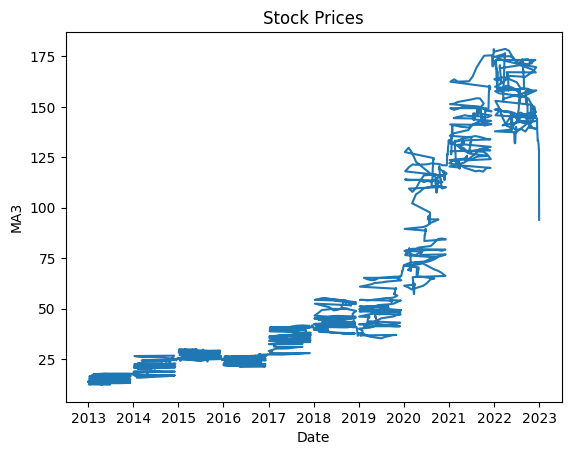

In [ ]:
plt.plot(df['Date'], df['MA3'])
# Adding Title to the Plot
plt.title("Stock Prices")
# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('MA3')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['MA9']], test_size=.2)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)
preds = reg.predict(X_test)

In [ ]:
print("Model Coefficients:", reg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, preds))
print("Coefficient of Determination:", r2_score(y_test, preds))

Model Coefficients: [[0.99543099]]
Mean Absolute Error: 1.596193722301786
Coefficient of Determination: 0.9972677341956543
